In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
combined_data = pd.read_excel('order_data_output.xlsx')
combined_data

,Order Time,Material Name,Purchase Quantity,PayMethod,PayStatus,Total Amount,Area
0,2025-01-01 09:34:08,X200 16GB+512GB Natural Green,1,Online payment,not paid,139999,Bausee
1,2025-01-01 00:43:15,Y19s 6GB+128GB Pearl Silver,1,Online payment,not paid,16999,Gazipur City
2,2025-01-01 00:28:47,Y19s 6GB+128GB Pearl Silver,1,Online payment,not paid,16999,Gazipur City
3,2025-01-01 15:04:02,V40 12GB+256GB Nebula Purple,1,Online payment,not paid,62999,Rampura
4,2025-01-01 14:31:18,V40 12GB+256GB Moonlight White,1,Online payment,not paid,62999,Rampura
...,...,...,...,...,...,...,...
1222,2025-03-26 00:36:12,Y28 8GB+128GB Gleaming Orange,1,AutoClose,not paid,22999,Teknaf
1223,2025-03-25 23:04:27,Y04 4GB+128GB Jade Green,1,AutoClose,not paid,12999,Gulshan
1224,2025-03-25 22:32:03,V50 12GB+256GB Satin Black,1,AutoClose,not paid,62999,Mujib Nagar
1225,2025-03-25 16:36:46,Y29 6GB+128GB Noble Brown,1,Paid,paid,19999,Comilla City


In [94]:
combined_data.columns

Index(['Order Time', 'Material Name', 'Purchase Quantity', 'PayMethod',
       'PayStatus', 'Total Amount', 'Area'],
      dtype='object')

In [95]:
# Analyzing sales trends over the three months
# First, I will convert the 'Order Time' column to datetime format for better analysis
combined_data['Order Time'] = pd.to_datetime(combined_data['Order Time'])

# Extracting month and year for grouping
combined_data['Year'] = combined_data['Order Time'].dt.year
combined_data['Month'] = combined_data['Order Time'].dt.month

In [100]:
combined_data.to_excel("data.xlsx")

In [96]:
combined_data.head(5)

,Order Time,Material Name,Purchase Quantity,PayMethod,PayStatus,Total Amount,Area,Year,Month
0,2025-01-01 09:34:08,X200 16GB+512GB Natural Green,1,Online payment,not paid,139999,Bausee,2025,1
1,2025-01-01 00:43:15,Y19s 6GB+128GB Pearl Silver,1,Online payment,not paid,16999,Gazipur City,2025,1
2,2025-01-01 00:28:47,Y19s 6GB+128GB Pearl Silver,1,Online payment,not paid,16999,Gazipur City,2025,1
3,2025-01-01 15:04:02,V40 12GB+256GB Nebula Purple,1,Online payment,not paid,62999,Rampura,2025,1
4,2025-01-01 14:31:18,V40 12GB+256GB Moonlight White,1,Online payment,not paid,62999,Rampura,2025,1


In [97]:
# Filtering the dataset for paid products only
paid_products = combined_data[combined_data['PayStatus'] == 'paid']

# Grouping by month and year to count the number of products sold
paid_monthly_sales = paid_products.groupby(['Year', 'Month'])['Purchase Quantity'].sum().reset_index()

# Creating a pivot table for better visualization
paid_monthly_sales_pivot = paid_monthly_sales.pivot(index='Month', columns='Year', values='Purchase Quantity')

# Displaying the monthly sales data for paid products
paid_monthly_sales_pivot_head = paid_monthly_sales_pivot.head()
print(paid_monthly_sales_pivot_head)

Year   2025
Month      
1        17
2        30
3        31


In [98]:
unique_months = paid_monthly_sales['Month'].unique()
print(unique_months)

[1 2 3]


C:\Users\ABS RAKIB\AppData\Local\Temp\ipykernel_5748\2274217433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=paid_monthly_sales, x='Month', y='Purchase Quantity', palette='coolwarm')


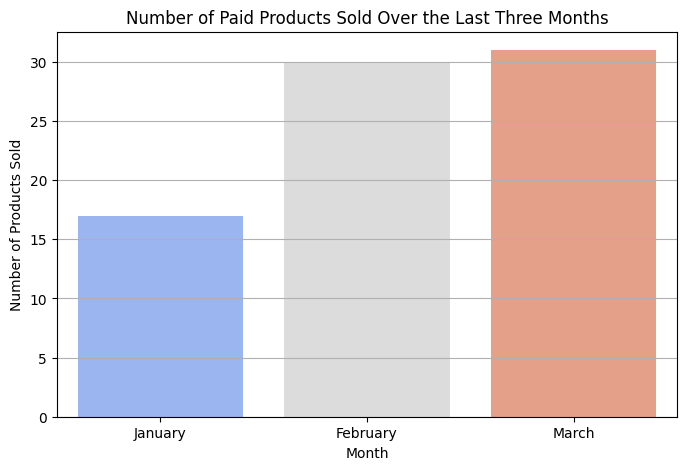

In [99]:
# Creating a bar chart to visualize the number of paid products sold each month (February, March, April)
plt.figure(figsize=(8, 5))
sns.barplot(data=paid_monthly_sales, x='Month', y='Purchase Quantity', palette='coolwarm')
plt.title('Number of Paid Products Sold Over the Last Three Months')
plt.xlabel('Month')
plt.ylabel('Number of Products Sold')
plt.xticks(ticks=[0, 1, 2], labels=['January', 'February', 'March'])
plt.grid(axis='y')

# Displaying the plot
plt.show()

In [106]:
# Filtering for paid products only
paid_products = combined_data[combined_data['PayStatus'] == 'paid']

# Grouping by Material Name to sum the Purchase Quantity
category_sales = paid_products.groupby('Material Name')['Purchase Quantity'].sum().reset_index()

# Sorting the results to find the top-selling products
top_selling_categories = category_sales.sort_values(by='Purchase Quantity', ascending=False).head(100)

# Displaying the top-selling product categories
print(top_selling_categories)

                         Material Name  Purchase Quantity
20           Y29 6GB+128GB Noble Brown                 10
15         Y19s 6GB+128GB Pearl Silver                  7
2     V40 Lite 8GB+128GB Emerald Green                  6
16           Y28 6GB+128GB Agate Green                  6
24           Y29 8GB+256GB Noble Brown                  6
4   V40 Lite 8GB+256GB Titanium Silver                  5
23         Y29 8GB+256GB Elegant white                  4
19         Y29 6GB+128GB Elegant white                  3
14        Y19s 6GB+128GB Diamond Black                  3
25        vivo Y03t 4GB+64GB Gem Green                  3
8        X200 16GB+512GB Natural Green                  3
9           Y03t 4GB+128GB Space Black                  3
1         V40 12GB+256GB Nebula Purple                  2
6           V50 12GB+256GB Starry Blue                  2
5           V50 12GB+256GB Satin Black                  2
3   V40 Lite 8GB+128GB Titanium Silver                  2
17           Y

In [111]:
paid_products_date = paid_products.groupby('Month')['Total Amount'].sum().reset_index()
paid_products_date

,Month,Total Amount
0,1,671992
1,2,941470
2,3,796969


In [112]:
import calendar
paid_products_date['Month'] = paid_products_date['Month'].apply(lambda x: calendar.month_name[x])
paid_products_date

,Month,Total Amount
0,January,671992
1,February,941470
2,March,796969


C:\Users\ABS RAKIB\AppData\Local\Temp\ipykernel_5748\1212077186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=paid_products_date, x='Month', y='Total Amount', palette='viridis')


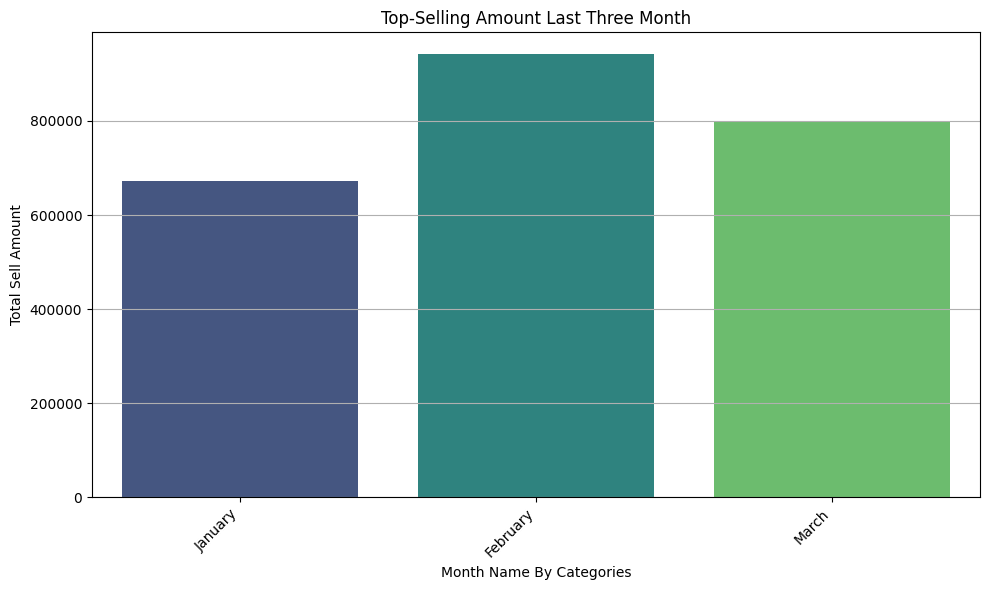

In [113]:
# Creating a bar chart to visualize the top-selling product categories
plt.figure(figsize=(10, 6))
sns.barplot(data=paid_products_date, x='Month', y='Total Amount', palette='viridis')
plt.title('Top-Selling Amount Last Three Month')
plt.xlabel('Month Name By Categories')
plt.ylabel('Total Sell Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Displaying the plot
plt.tight_layout()
plt.show()

In [107]:
# Grouping by Material Name to sum the Purchase Quantity
category_sales = paid_products.groupby('PayMethod')['Purchase Quantity'].sum().reset_index()

# Sorting the results to find the top-selling products
top_selling_categories_by_method = category_sales.sort_values(by='Purchase Quantity', ascending=False).head(100)

# Displaying the top-selling product categories
print(top_selling_categories_by_method)

  PayMethod  Purchase Quantity
1       ssl                 46
0      Paid                 32


In [103]:
# Grouping by City to sum the Purchase Quantity
city_sales = paid_products.groupby('Area')['Purchase Quantity'].sum().reset_index()

# Sorting the results to find the top-selling cities
top_selling_cities = city_sales.sort_values(by='Purchase Quantity', ascending=False).head(100)

# Displaying the top-selling cities
print(top_selling_cities)

                        Area  Purchase Quantity
40                   Rampura                  6
26              Khulna Sadar                  5
18                   Gulshan                  4
17                   Gazipur                  3
5               Bogura Sadar                  3
35         Narayanganj Sadar                  3
19                 Gulshan-2                  3
50                    Vatara                  2
32                 Moghbazar                  2
45              Sylhet Sadar                  2
23                    Jirani                  2
9           Chattogram Sadar                  2
34          Mymensingh Sadar                  2
36                   Pallabi                  2
31                  Mirpur 1                  1
33                 Motijheel                  1
39        Potenga chittagong                  1
37          Panchagarh Sadar                  1
38          Post office road                  1
29                    Laksam            

C:\Users\ABS RAKIB\AppData\Local\Temp\ipykernel_5748\1410905357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_selling_categories, x='Material Name', y='Purchase Quantity', palette='viridis')


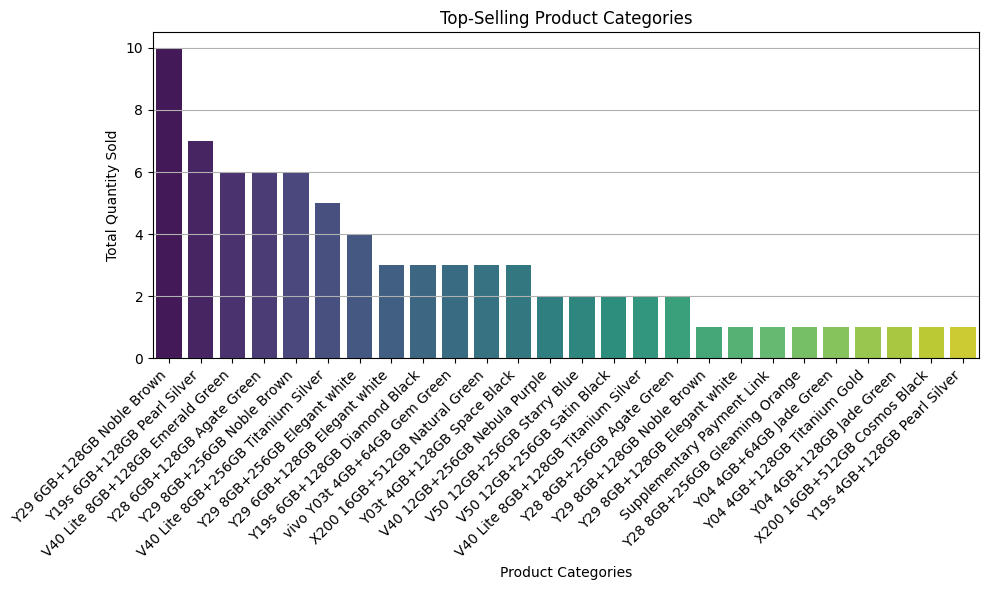

In [108]:
# Creating a bar chart to visualize the top-selling product categories
plt.figure(figsize=(10, 6))
sns.barplot(data=top_selling_categories, x='Material Name', y='Purchase Quantity', palette='viridis')
plt.title('Top-Selling Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Displaying the plot
plt.tight_layout()
plt.show()

C:\Users\ABS RAKIB\AppData\Local\Temp\ipykernel_5748\3478194890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_selling_cities, x='Area', y='Purchase Quantity', palette='viridis')


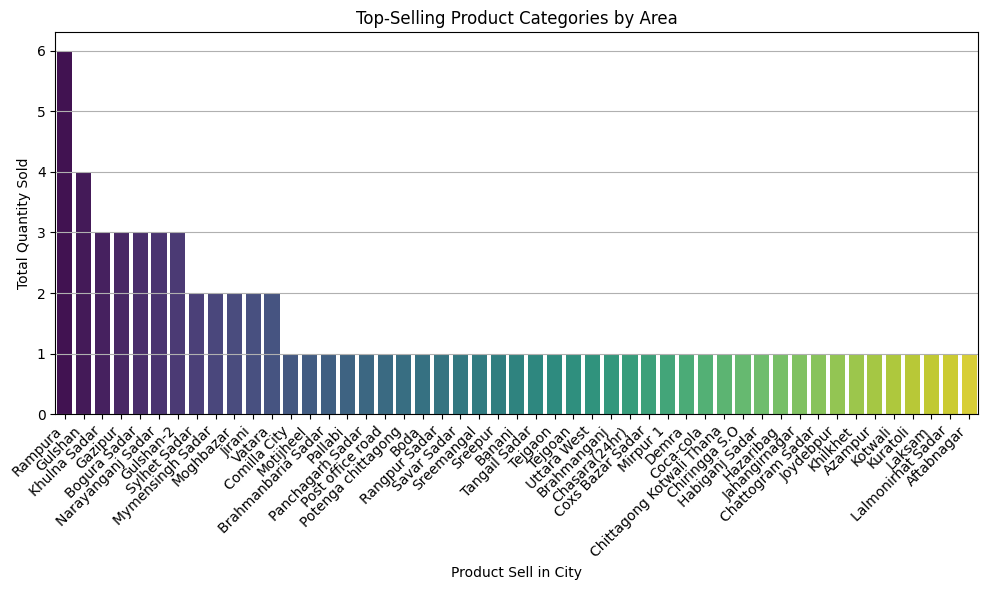

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_selling_cities, x='Area', y='Purchase Quantity', palette='viridis')
plt.title('Top-Selling Product Categories by Area')
plt.xlabel('Product Sell in City')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Displaying the plot
plt.tight_layout()
plt.show()

C:\Users\ABS RAKIB\AppData\Local\Temp\ipykernel_5748\2913433053.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Month', y='Total Product Sales', data=df, palette=palette)


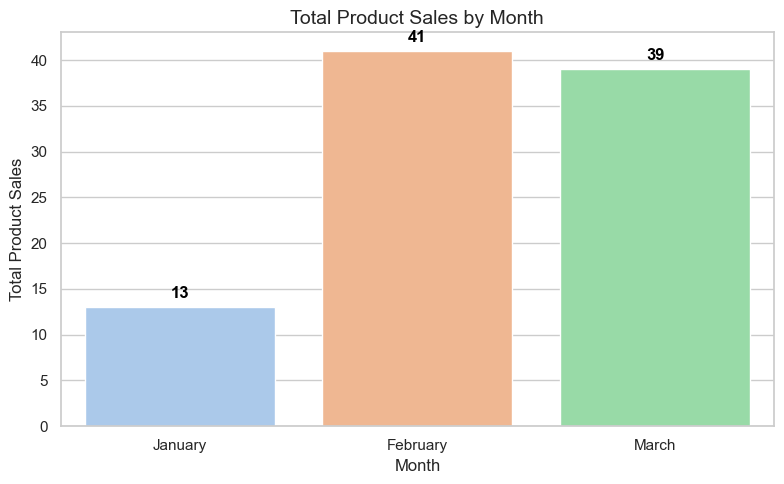

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Your data
data = {
    'Month': ['January', 'February', 'March'],
    'Total Product Sales': [13, 41, 39]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set theme
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
palette = sns.color_palette("pastel", n_colors=3)
bar_plot = sns.barplot(x='Month', y='Total Product Sales', data=df, palette=palette)

# Add value labels on top
for index, row in df.iterrows():
    bar_plot.text(index, row['Total Product Sales'] + 1, str(row['Total Product Sales']),
                  color='black', ha='center', fontweight='bold')

# Titles and labels
plt.title("Total Product Sales by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Product Sales")

# Show plot
plt.tight_layout()
plt.show()


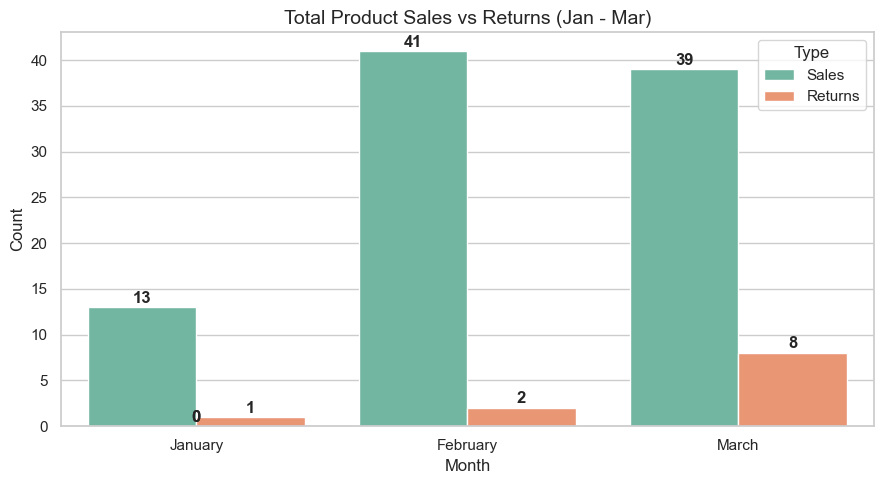

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# === Data ===
data = {
    'Month': ['January', 'January', 'February', 'February', 'March', 'March'],
    'Type': ['Sales', 'Returns', 'Sales', 'Returns', 'Sales', 'Returns'],
    'Count': [13, 1, 41, 2, 39, 8]
}

df = pd.DataFrame(data)

# === Plotting ===
sns.set_theme(style="whitegrid")
plt.figure(figsize=(9, 5))

# Grouped bar chart
bar_plot = sns.barplot(
    x='Month',
    y='Count',
    hue='Type',
    data=df,
    palette='Set2'
)

# Add labels on each bar
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 0.5,
        s=int(height),
        ha='center',
        fontweight='bold'
    )

# === Titles and Labels ===
plt.title("Total Product Sales vs Returns (Jan - Mar)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title='Type')

# === Final Touch ===
plt.tight_layout()
plt.show()
